In [150]:
# Importação das bibliotecas necessarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [111]:
# Carregando o junto de dados Titanic iretamente do GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [152]:
# Exibir as 5 primeiras linhas do DataFrame para uma visualização inicial
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Has_Cabin
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,0


In [113]:
# Exibir informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [117]:
# Visualizar os dados nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
# Remover as colunas irrelevantes para a análise 
df.drop(columns=[ "Name", "Ticket"], inplace=True)

In [154]:
# Criando uma coluna para indicar se o passageiro tinha cabine
df['Has_Cabin'] = df['Cabin'].notnull().astype(int)

In [156]:
# Preencher valores ausentes na coluna 'Age' com a mediana da idade
df["Age"].fillna(df["Age"].median())

# Prencher valores ausentes na coluna 'Embarked' com a moda (valores mais frequentes)
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [158]:
# Convertendo a coluna 'Sex' em valores numéricos
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [160]:
# Exibir o DataFrame atualizado para ver as alterações
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Has_Cabin
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,71.2833,C85,C,1
2,3,1,3,1,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,1,35.0,1,0,53.1000,C123,S,1
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,0


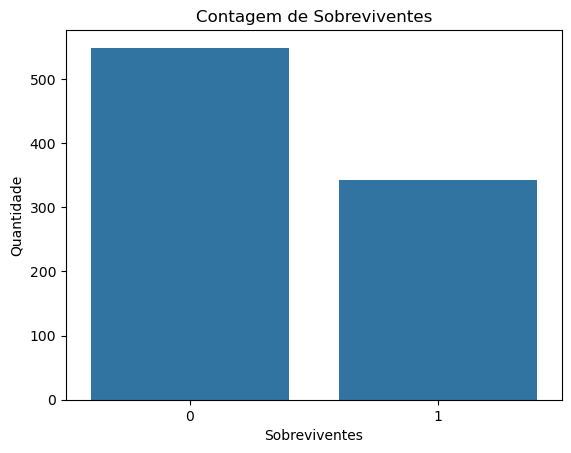

In [129]:
# Gráfico de contagem para visualizar o número de sobreviventes
sns.countplot(x="Survived", data=df)
plt.title('Contagem de Sobreviventes')
plt.xlabel('Sobreviventes')
plt.ylabel('Quantidade')
plt.show()

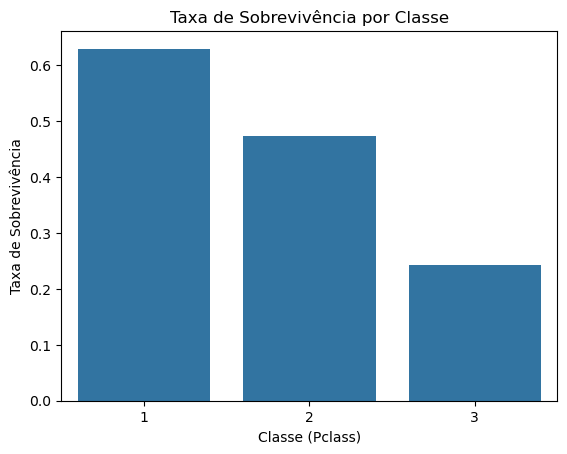

In [131]:
# Gráficos de barras para visualizar a taxa de sobrevivêntes por classes
sns.barplot(x='Pclass', y='Survived', data=df, errorbar=None)
plt.title('Taxa de Sobrevivência por Classe')
plt.xlabel('Classe (Pclass)')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

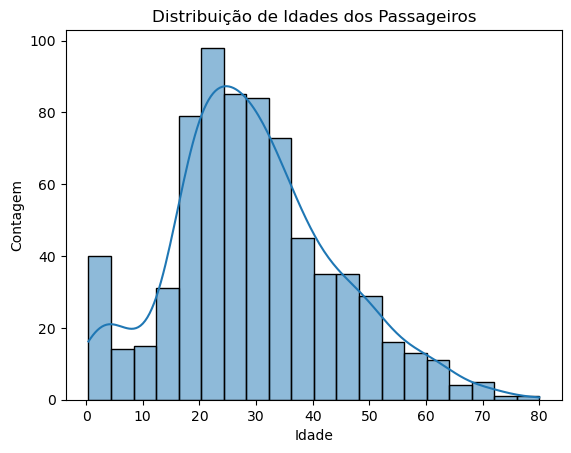

In [133]:
# Histograma para visualizar a distribuição das idades dos passageiros
sns.histplot(df['Age'], kde=True)
plt.title('Distribuição de Idades dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

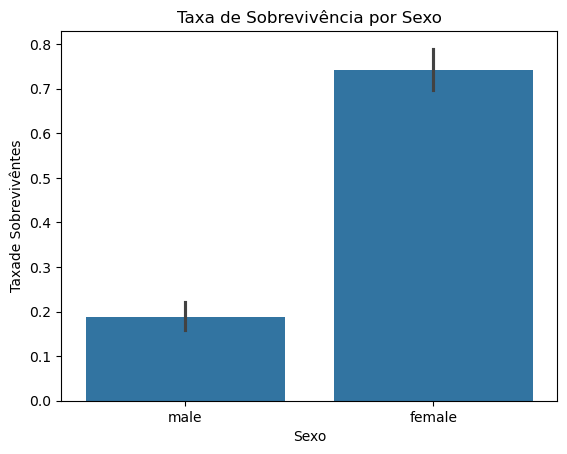

In [135]:
# Gráficos de barras comprarar a taxa sobrevivência entre os sexos
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Taxa de Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Taxade Sobrevivêntes')
plt.show()

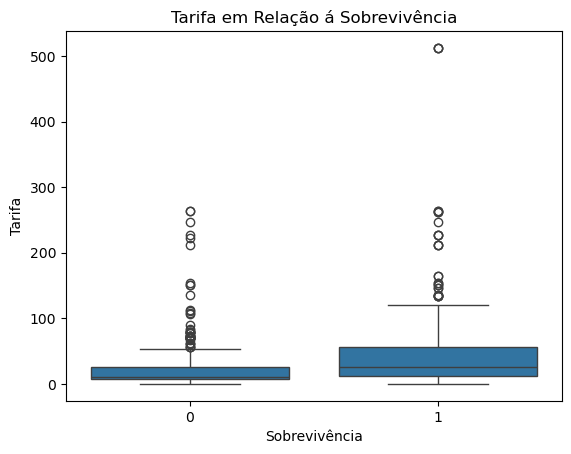

In [137]:

sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Tarifa em Relação á Sobrevivência')
plt.xlabel('Sobrevivência')
plt.ylabel('Tarifa')
plt.show()

In [139]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'Has_Cabin'],
      dtype='object')

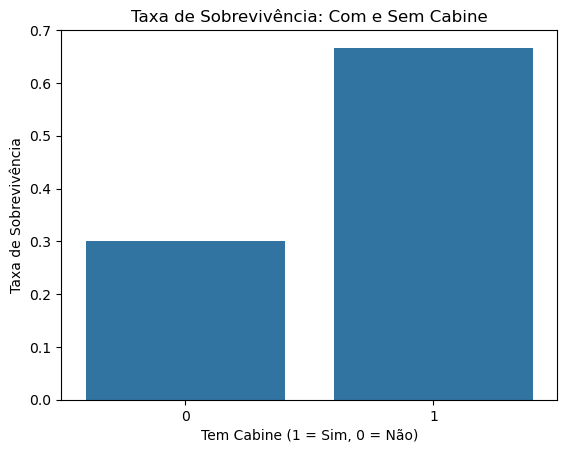

In [144]:
# Criando um gráfico de barras para comparar a taxa de sobrevivência entre passageiros com e sem cambine
sns.barplot(x='Has_Cabin', y='Survived', data=df, errorbar=None)
plt.title('Taxa de Sobrevivência: Com e Sem Cabine')
plt.xlabel('Tem Cabine (1 = Sim, 0 = Não)')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

In [146]:
# Calculando a média de sobrevivência para passageiros com e sem cabine 
survival_rates = df.groupby('Has_Cabin')['Survived'].mean()
survival_rates

Has_Cabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64

In [172]:
# Definindo os variavéis independentes e dependentes
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin']]
y = df['Survived']

In [178]:
# Dividindo e treinando o modelo Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
# Criando e treinando o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [182]:
# Fazendo previsões
y_pred = model.predict(X_test)

In [186]:
# Avaliando o modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

[[90 15]
 [19 55]]


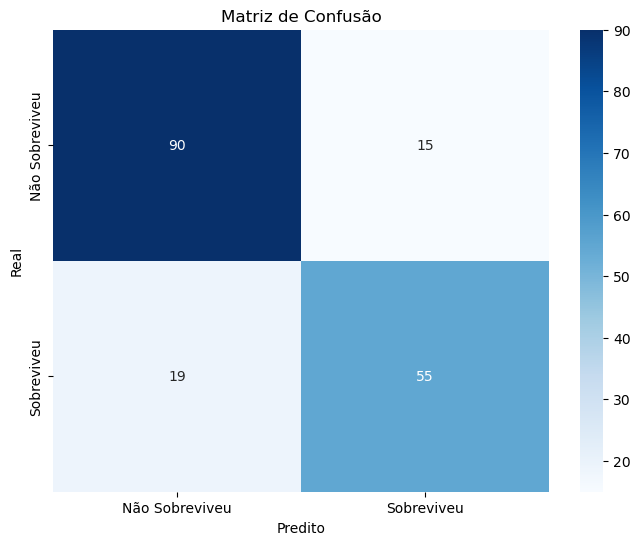

In [192]:
# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.ylabel('Real')
plt.xlabel('Predito')
plt.title('Matriz de Confusão')
plt.show()

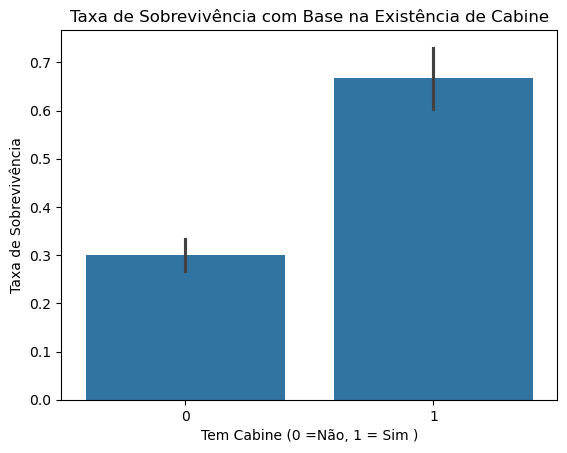

In [198]:
# Alnisando a relação entre a cabine e a sobrevivência
sns.barplot(x='Has_Cabin', y='Survived', data=df)
plt.title('Taxa de Sobrevivência com Base na Existência de Cabine')
plt.xlabel('Tem Cabine (0 =Não, 1 = Sim )')
plt.ylabel('Taxa de Sobrevivência')
plt.show()